In [18]:
import polars as pl 
import pandas as pd 
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df = pl.read_excel('Ratings_exercise.xlsx')
df 

Excel_Company_ID,year,ratings_a,ratings9,ratings2,rel_size,excess_rets,idio_stdev,ni_ta,tl_ta
str,i64,str,i64,i64,f64,f64,f64,f64,f64
"""IQ10004497""",2020,"""B""",5,0,-10.293775,0.48685,0.168548,0.030843,0.761333
"""IQ10004497""",2021,"""B""",5,0,-10.686001,-0.389887,0.093687,0.067523,0.732618
"""IQ10004497""",2022,"""B""",5,0,-11.171934,-0.326863,0.052476,0.08654,0.777718
"""IQ10004802""",2021,"""B""",5,0,-10.420863,2.030753,0.210264,0.077168,0.943621
"""IQ10004802""",2022,"""B""",5,0,-10.64648,-0.162391,0.152683,0.224777,0.72428
…,…,…,…,…,…,…,…,…,…
"""IQ9938532""",2021,"""BB""",4,0,-8.917385,-0.390153,0.087639,0.121127,1.278307
"""IQ9938532""",2022,"""B""",5,0,-9.82807,-0.541429,0.121614,0.158593,1.493475
"""IQ99856262""",2020,"""BB""",4,0,-9.158741,0.414319,0.153377,0.1072,0.492716


In [5]:
df['ratings_a'].unique()

ratings_a
str
"""CC"""
"""AA"""
"""A"""
"""CCC"""
"""D"""
"""AAA"""
"""B"""
"""BBB"""
"""BB"""


In [6]:
df['ratings9'].unique()

ratings9
i64
0
1
2
3
4
5
6
7
8


In [7]:
df['ratings2'].unique()

ratings2
i64
0
1


In [9]:
X = df[['rel_size', 'excess_rets', 'idio_stdev', 'ni_ta', 'tl_ta']]
X.shape


(2717, 5)

In [15]:
y = df['ratings2']
y.shape

(2717,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

df = pd.read_excel('Ratings_exercise.xlsx')

feature_cols = ['rel_size', 'excess_rets', 'idio_stdev', 'ni_ta', 'tl_ta']
X = df[feature_cols].values
y = df['ratings2'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedForwardNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)  
        )
        
    def forward(self, x):
        return self.network(x)

Processing Fold 1...


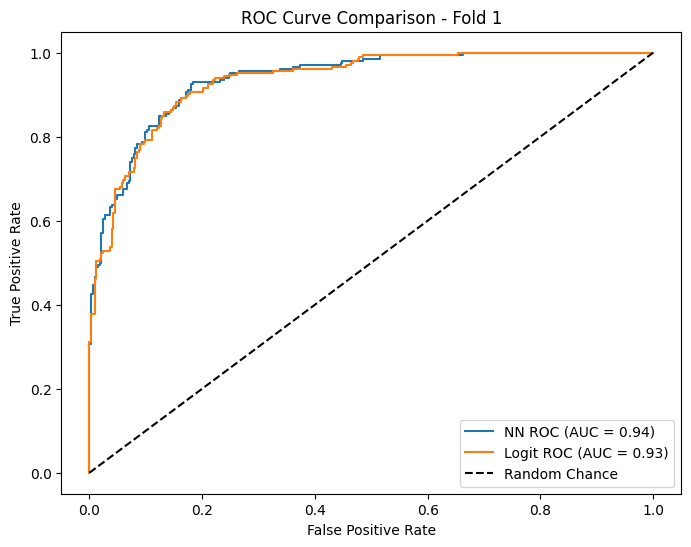

Processing Fold 2...


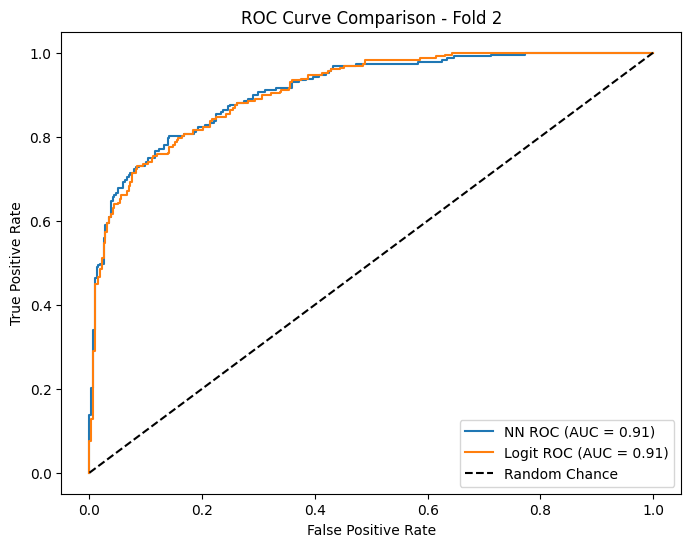

Processing Fold 3...


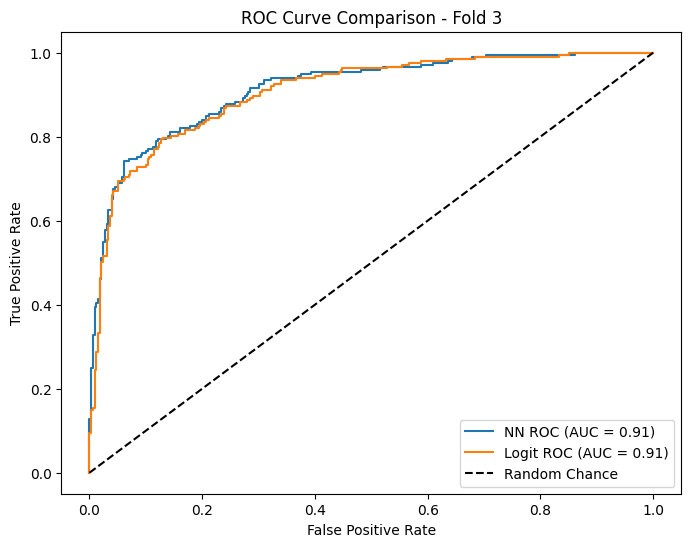

Processing Fold 4...


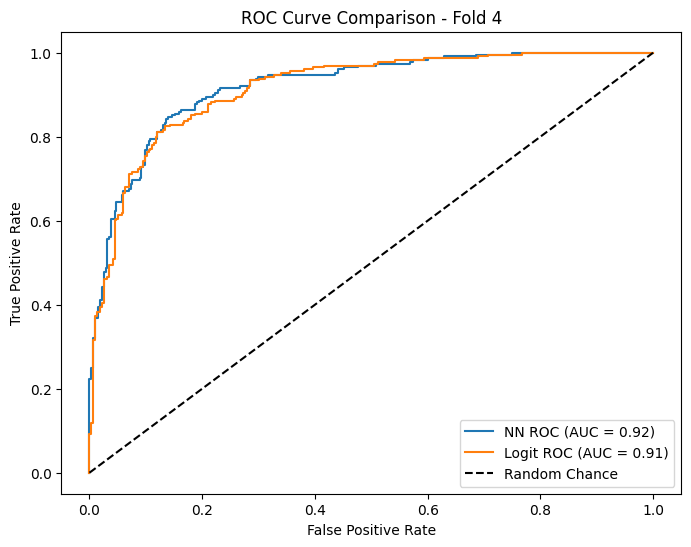

Processing Fold 5...


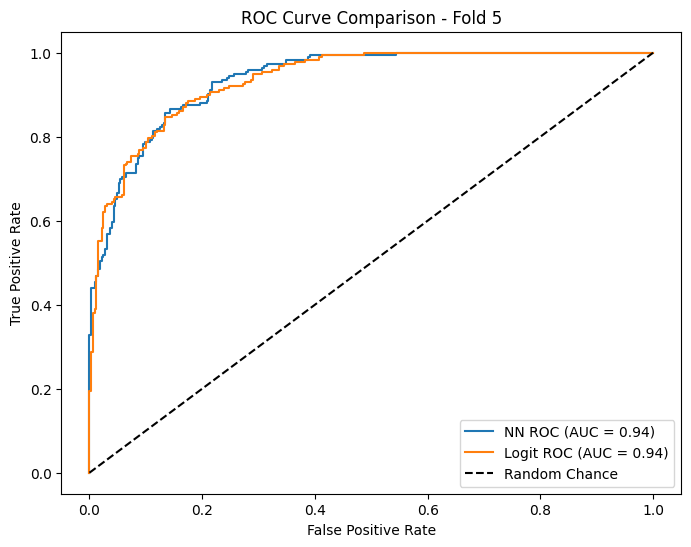

In [ ]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nn_auc_list = []
logit_auc_list = []

fold = 1
for train_index, test_index in kf.split(X_tensor):
    print(f"Processing Fold {fold}...")
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]


    model = FeedForwardNN(input_dim=X_tensor.shape[1]).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    model.train()
    num_epochs = 100 
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train.to(device))
        loss = criterion(outputs, y_train.to(device))
        loss.backward()
        optimizer.step()
    
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test.to(device))
        nn_probs = torch.sigmoid(test_outputs).cpu().numpy().flatten()
        y_true = y_test.numpy().flatten()
    
    fpr_nn, tpr_nn, _ = roc_curve(y_true, nn_probs)
    nn_auc = auc(fpr_nn, tpr_nn)
    nn_auc_list.append(nn_auc)
    

    lr_model = LogisticRegression()
    lr_model.fit(X_train.cpu().numpy(), y_train.cpu().numpy().ravel())
    lr_probs = lr_model.predict_proba(X_test.cpu().numpy())[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_true, lr_probs)
    lr_auc = auc(fpr_lr, tpr_lr)
    logit_auc_list.append(lr_auc)
    

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_nn, tpr_nn, label=f'NN ROC (AUC = {nn_auc:.2f})')
    plt.plot(fpr_lr, tpr_lr, label=f'Logit ROC (AUC = {lr_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison - Fold {fold}')
    plt.legend(loc="lower right")
    plt.show()
    
    fold += 1


In [ ]:

print("Average Neural Network AUC: {:.3f}".format(np.mean(nn_auc_list)))
print("Average Logistic Regression AUC: {:.3f}".format(np.mean(logit_auc_list)))

Average Neural Network AUC: 0.924
Average Logistic Regression AUC: 0.920
